# Limpieza Datos Muestras de Sangre y Socio Demográfico

## Descargar Librerías

In [2]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

## Ver bases de datos

In [4]:
muestraSangre=pd.read_csv("../data/MuestraSangre/ensanut2022_muestras.csv", sep=";")
muestraSangre.head()

,FOLIO_I,FOLIO_INT,t_hora,t_min,t_sumai,t_sumaf,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,...,valor_VIT_D,fecdeterm_VIT_D,ponde_v,cuenta_mic,ponde_m12a49,ponde_m0a11,estrato,region,est_sel,upm
0,2022_01001004,2022_01001004_01,13,35,813,815,13:33:14,10/11/2022,13:35:20,10/11/2022,...,,,,0,,,3,4,13,0100100011320
1,2022_01001008,2022_01001008_01,20,44,1244,1244,20:34:12,20/11/2022,20:34:55,20/11/2022,...,,,,0,,,3,4,13,0100100011320
2,2022_01001008,2022_01001008_03,20,43,1243,1243,20:41:51,20/11/2022,20:42:23,20/11/2022,...,,,,0,,,3,4,13,0100100011320
3,2022_01001009,2022_01001009_02,9,26,561,566,09:21:48,10/11/2022,09:26:03,10/11/2022,...,,,"16452,5523392573",0,,,3,4,13,0100100011320
4,2022_01001011,2022_01001011_01,20,49,1249,1249,20:45:31,20/11/2022,20:46:06,20/11/2022,...,,,,0,,,3,4,13,0100100011320


In [5]:
socioDemo=pd.read_csv("../data/SocioDemo/ensanut2022_socdem.csv", sep=";")
socioDemo.head()

/var/folders/0_/7n0t56ss7mj2g0pvgzln5wvw0000gn/T/ipykernel_44886/3196618492.py:1: DtypeWarning: Columns (10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  socioDemo=pd.read_csv("../data/SocioDemo/ensanut2022_socdem.csv", sep=";")


,FOLIO_I,FOLIO_INT,id_int,maquina1,entidad1,desc_ent1,municipio1,desc_mun1,h0302,h0303,...,h16054e,h1607,h1607e,completa1,region,entidad,ponde_f,estrato,est_sel,upm
0,2022_01001001,2022_01001001_01,1,MQ426,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,51,...,,,,1,4,1,"706,78491885843",3,13,0100100011320
1,2022_01001001,2022_01001001_02,2,MQ426,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,14,...,,,,1,4,1,"937,020931828615",3,13,0100100011320
2,2022_01001002,2022_01001002_01,1,MQ417,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,60,...,,,,1,4,1,"760,861696609056",3,13,0100100011320
3,2022_01001002,2022_01001002_02,2,MQ417,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,60,...,,,,1,4,1,"706,78491885843",3,13,0100100011320
4,2022_01001003,2022_01001003_01,1,MQ425,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,64,...,,15,,1,4,1,"706,78491885843",3,13,0100100011320


In [7]:
muestraSangre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13899 entries, 0 to 13898
Columns: 132 entries, FOLIO_I to upm
dtypes: int64(26), object(106)
memory usage: 14.0+ MB


In [8]:
socioDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36483 entries, 0 to 36482
Columns: 154 entries, FOLIO_I to upm
dtypes: int64(27), object(127)
memory usage: 42.9+ MB


Como hay muchísimas columnas, necesitamos ver si todas nos sirven

----

# Limpieza de Datos

## Detectar registros vacíos

Checamos las cantidades de nans

In [9]:
muestraSangre.isna().sum().sort_values(ascending= False)

FOLIO_I                0
MATRIZ_SUERO           0
fecdeterm_GLU_SUERO    0
valor_GLU_SUERO        0
fecdeterm_CREAT        0
                      ..
h0303                  0
h0302                  0
desc_mun               0
municipio              0
upm                    0
Length: 132, dtype: int64

Nos dimos cuenta que no hay nans, sino observaciones que son simplemente un espacio `\s`. Ahora mejor veremos el porcentaje que son solo espacios.

In [10]:
muestraSangre.astype(str).apply(lambda col: col.str.fullmatch(r"\s*").sum() / len(muestraSangre) * 100).sort_values(ascending=False).head(30)

hb11                    100.000000
hb04                     99.021512
otroent                  98.762501
ponde_m0a11              92.244046
ponde_m12a49             91.438233
valor_EAG                85.157206
fecdeterm_EAG            85.157206
valor_HB1AC              85.157206
fecdeterm_HB1AC          85.157206
valor_STFR_FEB23         85.085258
fecdeterm_STFR_FEB23     85.085258
fecdeterm_GLU_SUERO      84.955752
valor_AC_URICO           84.955752
fecdeterm_INSULINA       84.955752
fecdeterm_PCR            84.955752
valor_ALBU               84.955752
valor_TRIG               84.955752
fecdeterm_TRIG           84.955752
valor_INSULINA           84.955752
fecdeterm_AC_URICO       84.955752
valor_PCR                84.955752
fecdeterm_ALBU           84.955752
fecdeterm_COL_LDL        84.955752
fecdeterm_COL_HDL        84.955752
valor_COL_LDL            84.955752
valor_GLU_SUERO          84.955752
fecdeterm_CREAT          84.955752
valor_CREAT              84.955752
fecdeterm_COLEST    

In [29]:
socioDemo.astype(str).apply(lambda col: col.str.fullmatch(r"\s*").sum() /  len(socioDemo) * 100).sort_values(ascending=False).head(30)

H1213T      100.000000
h16054e      99.997259
H0407C       99.994518
H1213S       99.994518
h16053e      99.994518
h0603i       99.991777
h16052e      99.986295
h16051e      99.983554
H0310C       99.980813
H0407B       99.980813
H1213R       99.978072
h0603n       99.958885
H1213Q       99.950662
H0405C       99.947921
h0407esp     99.936957
h0603m       99.931475
H1213P       99.925993
h0603f       99.901324
H1213O       99.895842
h0603g       99.879396
H1213N       99.857468
h0306p       99.846504
h0603h       99.827317
h0603j       99.821835
H1213M       99.810871
H0407A       99.797166
H1213L       99.761533
h0408esp     99.731382
h0405esp     99.731382
h0324esp     99.723159
dtype: float64

Observamos que hay muchísimas (por lo menos 30 de cada dataset) que son 99% conformados por registros vacíos. Esto sería un inconveniente en el análisis ya que sería en una muestra pequeña, una gran cantidad de imputanciones y una práctica inadecuada.

In [12]:
socioDemo.astype(str).apply(lambda col: col.str.fullmatch(r"\s*").sum() /  len(socioDemo) * 100).eq(0).sum()

np.int64(34)

In [13]:
muestraSangre.astype(str).apply(lambda col: col.str.fullmatch(r"\s*").sum() / len(muestraSangre) * 100).eq(0).sum()

np.int64(39)

Al contar la cantidad de columnas que están completas, son 34 mas o menos de ambos (parece poco contando que son 150 columnas aprox).

---

## Borrar variables bajo una cota

Quitar variables > 40% NAN o sólo espacios

In [14]:
muestraSangre_clean = muestraSangre.drop(
    columns=(
        muestraSangre.astype(str)
        .apply(lambda col: col.str.fullmatch(r"\s*").sum() / len(muestraSangre) * 100)
        .loc[lambda s: s > 40].index
    )
)

In [15]:
muestraSangre_clean

,FOLIO_I,FOLIO_INT,t_hora,t_min,t_sumai,t_sumaf,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,...,hora_fin,fecha_fin,completa,MATRIZ_SUERO,MATRIZ_SANGRE,cuenta_mic,estrato,region,est_sel,upm
0,2022_01001004,2022_01001004_01,13,35,813,815,13:33:14,10/11/2022,13:35:20,10/11/2022,...,13:35:20,10/11/2022,1,0,0,0,3,4,13,0100100011320
1,2022_01001008,2022_01001008_01,20,44,1244,1244,20:34:12,20/11/2022,20:34:55,20/11/2022,...,20:44:37,20/11/2022,5,0,0,0,3,4,13,0100100011320
2,2022_01001008,2022_01001008_03,20,43,1243,1243,20:41:51,20/11/2022,20:42:23,20/11/2022,...,20:43:48,20/11/2022,5,0,0,0,3,4,13,0100100011320
3,2022_01001009,2022_01001009_02,9,26,561,566,09:21:48,10/11/2022,09:26:03,10/11/2022,...,09:26:03,10/11/2022,1,1,1,0,3,4,13,0100100011320
4,2022_01001011,2022_01001011_01,20,49,1249,1249,20:45:31,20/11/2022,20:46:06,20/11/2022,...,20:49:53,20/11/2022,5,0,0,0,3,4,13,0100100011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13894,2022_32056028,2022_32056028_02,21,24,1284,1284,21:21:45,27/11/2022,21:23:31,27/11/2022,...,21:24:59,27/11/2022,5,0,0,0,3,4,323,3205600011061
13895,2022_32056028,2022_32056028_03,22,59,1378,1379,22:56:45,27/11/2022,22:58:21,27/11/2022,...,22:59:13,27/11/2022,5,0,0,0,3,4,323,3205600011061
13896,2022_32056029,2022_32056029_01,9,33,515,573,08:35:37,08/11/2022,09:33:20,08/11/2022,...,09:33:20,08/11/2022,1,1,1,0,3,4,323,3205600011061
13897,2022_32056029,2022_32056029_03,9,38,573,578,09:33:21,08/11/2022,09:38:19,08/11/2022,...,09:38:19,08/11/2022,1,1,1,6,3,4,323,3205600011061


In [16]:
socioDemo_clean = socioDemo.drop(
    columns=(
        socioDemo.astype(str)
        .apply(lambda col: col.str.fullmatch(r"\s*").sum() / len(socioDemo) * 100)
        .loc[lambda s: s > 40].index
    )
)

In [17]:
socioDemo_clean

,FOLIO_I,FOLIO_INT,id_int,maquina1,entidad1,desc_ent1,municipio1,desc_mun1,h0302,h0303,...,h16041a,h16051,h16042d,completa1,region,entidad,ponde_f,estrato,est_sel,upm
0,2022_01001001,2022_01001001_01,1,MQ426,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,51,...,2021,4,2,1,4,1,"706,78491885843",3,13,0100100011320
1,2022_01001001,2022_01001001_02,2,MQ426,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,14,...,2022,1,2,1,4,1,"937,020931828615",3,13,0100100011320
2,2022_01001002,2022_01001002_01,1,MQ417,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,60,...,2021,3,77,1,4,1,"760,861696609056",3,13,0100100011320
3,2022_01001002,2022_01001002_02,2,MQ417,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,60,...,2021,3,77,1,4,1,"706,78491885843",3,13,0100100011320
4,2022_01001003,2022_01001003_01,1,MQ425,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,64,...,,,,1,4,1,"706,78491885843",3,13,0100100011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36478,2022_32056029,2022_32056029_02,2,MQ419,32,32 ZACATECAS,56,056 ZACATECAS,2,60,...,2021,1,26,1,4,32,"1443,92790947954",3,323,3205600011061
36479,2022_32056029,2022_32056029_03,3,MQ419,32,32 ZACATECAS,56,056 ZACATECAS,2,31,...,2021,9,99,1,4,32,"1921,99512866583",3,323,3205600011061
36480,2022_32056029,2022_32056029_04,4,MQ419,32,32 ZACATECAS,56,056 ZACATECAS,2,25,...,2021,1,11,1,4,32,"1921,99512866583",3,323,3205600011061
36481,2022_32056030,2022_32056030_01,1,MQ419,32,32 ZACATECAS,56,056 ZACATECAS,1,60,...,2021,1,27,1,4,32,"1554,40418955491",3,323,3205600011061


Ambos datasets se redujeron a 50 columnas, considerando que ambos tienen 30 columnas completas esto hace al dataset bastante competente.

## Histograma

Hicimos un histograma donde para observar cuántas columnas tienen qué porcentaje de observaciones vacías.

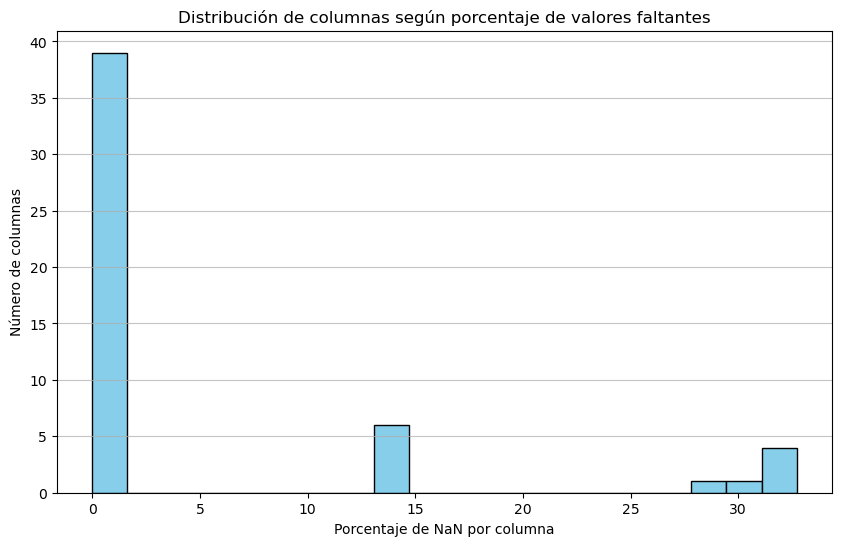

In [24]:
MSmissing_pct = (
    muestraSangre_clean.astype(str)
    .apply(lambda col: col.isna() | col.str.fullmatch(r"\s*"))
    .sum() / len(muestraSangre_clean) * 100
)


plt.figure(figsize=(10,6))
plt.hist(MSmissing_pct, bins=20, edgecolor='k', color='skyblue')
plt.xlabel("Porcentaje de NaN por columna")
plt.ylabel("Número de columnas")
plt.title("Distribución de columnas según porcentaje de valores faltantes")
plt.grid(axis='y', alpha=0.75)
plt.show()

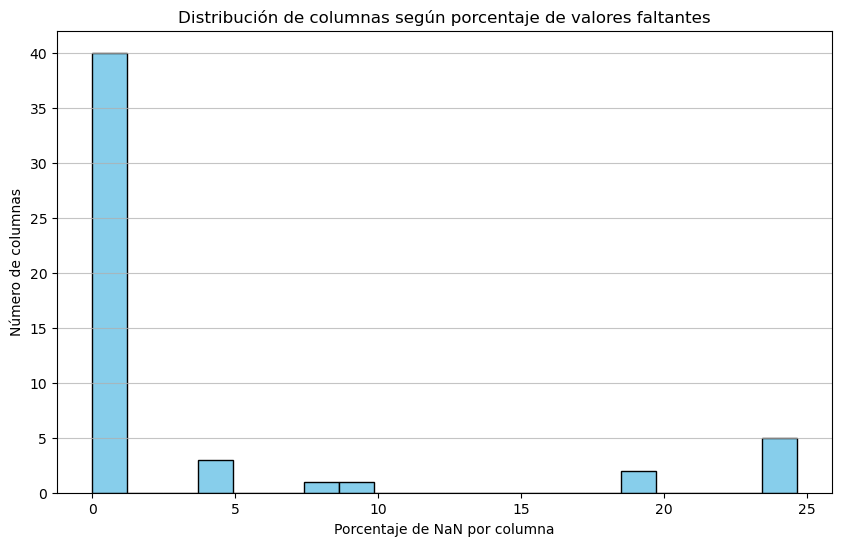

In [25]:
SDmissing_pct = (
    socioDemo_clean.astype(str)
    .apply(lambda col: col.isna() | col.str.fullmatch(r"\s*"))
    .sum() / len(socioDemo_clean) * 100
)


plt.figure(figsize=(10,6))
plt.hist(SDmissing_pct, bins=20, edgecolor='k', color='skyblue')
plt.xlabel("Porcentaje de NaN por columna")
plt.ylabel("Número de columnas")
plt.title("Distribución de columnas según porcentaje de valores faltantes")
plt.grid(axis='y', alpha=0.75)
plt.show()

Se hace notar que hay muy pocas columnas con falta de observaciones. El procedimiento a seguir es el siguiente.
1. Enlistar cuales variables son estas con observaciones vacías
2. Revisar con los expertos que estas no sean relevantes.
3. las que no lo sean, las eliminamos y las que sean relevantes las imputamos.

In [27]:
# Lista de columnas con >0% de valores faltantes
MScols_with_missing = MSmissing_pct[MSmissing_pct > 0].index.tolist()

MScols_with_missing


['fech_nac',
 'sc',
 'sv',
 'sh',
 'sm',
 'int_hemoglobina',
 'nota11',
 'nota00',
 'sc01',
 'sc02',
 'sc03',
 'sc04']

In [28]:
# Lista de columnas con >0% de valores faltantes
SDcols_with_missing = SDmissing_pct[SDmissing_pct > 0].index.tolist()

SDcols_with_missing

['h0304',
 'h0304d',
 'h0304m',
 'h0304a',
 'meses',
 'h0311',
 'h0313',
 'h0317a',
 'h0317g',
 'h0319',
 'h0321',
 'h0601a',
 'h0601l',
 'h16041d',
 'h16041m',
 'h16041a',
 'h16051',
 'h16042d']